Exercícios sobre distribuições
==============================
Discentes: José David e Eric Leandro
==============================


## Contextualização



A confirmação da teoria da Relatividade Geral de Albert Einstein durante o eclipse solar de 1919 é um momento marcante na história da ciência. O experimento, conduzido por Sir Arthur Eddington, tinha como objetivo testar uma das principais previsões da Relatividade Geral: a curvatura da luz pela gravidade.

A Teoria Geral da Relatividade de Einstein, publicada em 1915, introduziu uma nova compreensão da gravidade. Em vez da visão clássica da gravidade como uma força, a teoria de Einstein propôs que objetos massivos, como o Sol, deformam o tecido do espaço-tempo ao seu redor. A luz que passa perto de um objeto massivo destes seguiria um caminho curvo devido a essa distorção, criando o efeito de lente gravitacional.

A teoria de Einstein previu que, durante um eclipse solar, quando a massa do Sol bloqueasse a luz de estrelas distantes, as posições dessas estrelas pareceriam deslocadas devido ao campo gravitacional do Sol. As posições observadas das estrelas seriam diferentes de suas posições esperadas se a gravidade não afetasse a luz. Especificamente, as posições das estrelas seriam deslocadas para fora do Sol.

Os resultados esperados do experimento envolviam a medição do deslocamento angular das estrelas quando elas apareciam perto do Sol durante um eclipse solar total. O deslocamento angular seria a diferença entre a posição aparente de uma estrela e sua posição real na ausência da gravidade do Sol:

A teoria de Einstein previu que esse deslocamento angular seria de aproximadamente 1,75 segundo de arco (arcseg) para estrelas que estivessem próximas ao Sol durante o eclipse.

Arthur Eddington organizou duas expedições - uma para Sobral, no Brasil, e outra para a Ilha do Príncipe, na África Ocidental - para observar o eclipse solar total de 29 de maio de 1919. As equipes tiraram fotografias das estrelas que estavam próximas ao Sol durante o eclipse.

As fotografias tiradas durante o eclipse foram comparadas com fotografias do mesmo campo estelar tiradas quando o Sol não estava nas proximidades. As posições observadas das estrelas foram de fato deslocadas para fora do Sol, de acordo com as previsões de Einstein.

**O deslocamento angular medido das estrelas durante o eclipse de 1919 foi de aproximadamente 1,98 arcseg.**



## Objetivo



Suponha que pelo modelo de Einstein e pelos equipamentos utilizados, o valor esperado para o deslocamento angular segue uma distribuição normal $\mathcal{N}(1.75, 0.02)$ (isto é, tem média de 1,75 e variância de 0,02). Proponha e execute um teste de hipótese para testar o modelo de Einstein na luz do resultado obtido usando de simulação.

**Dica**: preste atenção na sua formulação da hipótese alternativa. Existem pelo menos duas possibilidades de hipóteses alternativas aqui. Após escolher sua hipótese alternativa, pense com carinho sobre qual estatística de teste que irá utilizar.

**Observação 1**: não serão consideradas respostas que usam testes estatísticos prontos, o objetivo do exercício é elaborar o teste do início ao fim, seguindo um procedimento similar ao que estudamos no notebook 9.

**Observação 2**: preste atenção em *todas* as informações disponíveis no notebook 9. Observem que justificativas como &ldquo;eu não vi que tinha isso escrito aqui&rdquo; não se sustentam caso queiram revisar a nota recebida.

**Observação 3**: se o enunciado não estiver claro por qualquer motivo, então <u>postar no grupo do teams</u> com antecedência suficiente para que o professor possa responder. Sua dúvida pode ser a mesma dúvida de um colega.



## Métodos

In [148]:
confianca = 0.9

Inicialmente defino um nível de confiança como sendo de 90% <br>

Para o teste do módelo, vamos definir as seguintes hipóteses:

-   $H_0$ O modelo descrito por Einstein e seus cálculos estão corretos.

-   $H_1$  O modelo descrito por Einstein e seus cálculos não estão corretos.


Inicialmente, importamos as bibliotecas que serão usadas. Ressaltamos que boa parte das células em python foram copiadas do material 9 e levemente alteradas.<sup>[1]</sup>

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Defino uma função para calcular a distância, e a utilizo de início para encontrar a estatística de teste.

In [150]:
def distancia_var(v_esperado,v_observado):
    distancia = abs(v_esperado-v_observado)
    return distancia

In [151]:
valor_observado = 1.98
valor_esperado = 1.75

estatisca_de_teste = distancia_var(valor_esperado,valor_observado)

print(f'Estatística de teste é {estatisca_de_teste}')

Estatística de teste é 0.22999999999999998


Para simular a distância obtida entre o valor esperado e um valor sorteado dentro da variância dada, realizo um sorteio aleatório com a média esperada e uso a raiz da variância(desvio padrão) como parametro para o sorteio normal do numpy. 

In [152]:
def simulacao():
    
    media = 1.75
    variancia = 0.02
    sorteio = np.random.normal(media, np.sqrt(variancia))
    distancia = distancia_var(sorteio, valor_esperado)
    return distancia



Para realizarmos várias simulações, criamos a função abaixo, a qual retorna uma lista com os resultados da simulações feitas.

In [153]:
def experimento(n):
    resultado = []
    for _ in range(n):
        distancia = simulacao()
        resultado.append(distancia)
    return resultado


NUM_REPETICOES = 1000000

resultado = experimento(NUM_REPETICOES)

Apenas plotamos o histograma como comparativo com o método descrito no material 9, confirmando se o passo a passo estava ok. 

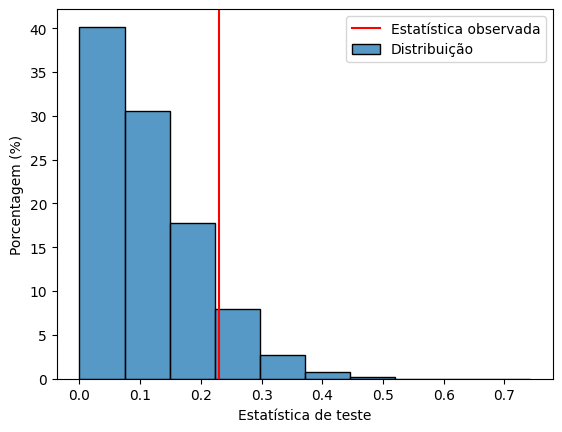

In [154]:
eixo = sns.histplot(resultado, stat="percent", bins=10, label="Distribuição")
eixo.axvline(estatisca_de_teste, label="Estatística observada", color="red")
eixo.set_xlabel("Estatística de teste")
eixo.set_ylabel("Porcentagem (%)")
eixo.legend()

Para sabermos se devemos ou não rejeitar o H0, realizamos o cálculo do pvalor. Considerando uma significia igual a 1 menos o nível de confiança determinado no início. Criamos uma lógica que consiste em conferir os valores do array resultado que são maior que a estatística de teste. Finalmente, o cálculo do pvalor é feito como sendo a fração de valores no total que seguem a lógica estabelecida. A partir do pvalor ser maior ou menor que a significancia, é exibido se H0 deve ser rejeitado ou não.

In [155]:
significancia = 1-confianca

array = np.array(resultado)
logic = array >= estatisca_de_teste

pvalor = sum(logic) / len(array)

print(f"A fração de simulações tão ruins ou mais que a estatística observada foi de {pvalor:.5f}")

print()

if pvalor < significancia:
    print("Com esta observação, devemos rejeitar H0")
else:
    print("Com esta observação, não devemos rejeitar H0")

A fração de simulações tão ruins ou mais que a estatística observada foi de 0.10424

Com esta observação, não devemos rejeitar H0


## Resultado e discussão



A partir do procedimento feito, é possível concluir que não devemos rejeitar H0, tendo em vista que o pvalor calculado é maior que a significância.

## Referências

[1] Daniel R. Cassar, PROBABILIDADE E ESTATÍSTICA, 9- Testes de hipóteses.





1.  O texto utilizado na contextualização do problema foi levemente modificado de um texto gerado pelo chatGPT com o intuito de propor um problema científico interessante.



## Playground



Use este espaço para fazer o que quiser. Não será considerado na correção.

